# Things I want to Accomplish with this Dataset

### Objectives
---
- See which artists appear in which decades
- See who was in the Billboard Top 100 the most (Done)
- See who has appeared more than 10 times (Done)
- Separate the lyrics and see what words were most used by decade

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import regex as re

In [63]:
# Importing the Billboard Top 100 Data
lyrics = pd.read_csv('billboard_lyrics_1964-2015.csv', encoding = 'Latin-1')

In [3]:
lyrics

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
...,...,...,...,...,...,...
5095,96,el perdon,nicky jam and enrique iglesias,2015,enrique iglesias dime si es verdad me dijeron ...,3.0
5096,97,she knows,neyo featuring juicy j,2015,NaN,NaN
5097,98,night changes,one direction,2015,going out tonight changes into something red ...,1.0
5098,99,back to back,drake,2015,oh man oh man oh man not againyeah i learned ...,1.0


In [4]:
# lyrics = lyrics.dropna()
# lyrics

In [5]:
# Grouping the Data by Artist
artist = lyrics.groupby(by='Artist')
# A method use to call on a prticular artist
artist.get_group('madonna')

,Rank,Song,Artist,Year,Lyrics,Source
1934,35,borderline,madonna,1984,something in the way you love me wont let me ...,1.0
1965,66,lucky star,madonna,1984,you must be my lucky star cause you shine on ...,1.0
1978,79,holiday,madonna,1984,holiday celebrate holiday celebrateif we took...,1.0
2001,2,like a virgin,madonna,1985,i made it through the wilderness somehow i ma...,1.0
2008,9,crazy for you,madonna,1985,swaying room as the music starts strangers ma...,1.0
2057,58,material girl,madonna,1985,some boys kiss me some boys hug me i think th...,1.0
2080,81,angel,madonna,1985,why am i standing on a cloud every time youre...,1.0
2097,98,dress you up,madonna,1985,youve got style thats what all the girls say ...,1.0
2128,29,papa dont preach,madonna,1986,,1.0
2134,35,live to tell,madonna,1986,i have a tale to tell sometimes it gets so ha...,1.0


In [6]:
# Grouping the Data by Year
year = lyrics.groupby(by='Year')
# Checking to see if it groups by Year properly
year.get_group(2015)

,Rank,Song,Artist,Year,Lyrics,Source
5000,1,uptown funk,mark ronson featuring bruno mars,2015,this hit that ice cold michelle pfeiffer that...,1.0
5001,2,thinking out loud,ed sheeran,2015,when your legs dont work like they used to be...,1.0
5002,3,see you again,wiz khalifa featuring charlie puth,2015,its been a long day without you my friend and...,1.0
5003,4,trap queen,fetty wap,2015,im like hey wassup hello seen yo pretty ass s...,1.0
5004,5,sugar,maroon 5,2015,im hurting baby im broken down i need your lo...,1.0
...,...,...,...,...,...,...
5095,96,el perdon,nicky jam and enrique iglesias,2015,enrique iglesias dime si es verdad me dijeron ...,3.0
5096,97,she knows,neyo featuring juicy j,2015,NaN,NaN
5097,98,night changes,one direction,2015,going out tonight changes into something red ...,1.0
5098,99,back to back,drake,2015,oh man oh man oh man not againyeah i learned ...,1.0


### Finding who has the most hits on the Billboard Top 100

In [7]:
# Making an empty dictionary
artist_count = dict()

#Using iterrows over the Pandas DataFrame to add up the count for each Artist in the Dataset
for index, row in lyrics.iterrows():
#     If the Artist isn't yet in the Dictionary, it adds them. Otherwise it increments plus one.
    if row['Artist'] not in artist_count:
        artist_count[row['Artist']] = 1
    else:
        artist_count[row['Artist']] += 1

In [8]:
# Finding the max value in the Dictionary
max(artist_count.values())

35

In [9]:
# Checking to see if more than one Artist has the max value and if so, which Artist is it
for i, j in artist_count.items():
    if artist_count[i] == 35:
        print(i)

madonna


In [61]:
# A Dictionary Comprehension used to make a new Dictionary with Artists that have been on the Billboard more than 10 Times
major_artists = {key: value for (key, value) in artist_count.items() if value >= 10 }
print(len(major_artists))

# Sorting the Dictionary from Max number to 10 so it is easier to interpret on a Bar chart
major_artists_sort = {k: v for k, v in sorted(major_artists.items(), key=lambda item: item[1], reverse=True)}
print(major_artists_sort)

59
{'madonna': 35, 'elton john': 26, 'mariah carey': 25, 'stevie wonder': 22, 'michael jackson': 22, 'janet jackson': 22, 'whitney houston': 19, 'rihanna': 19, 'taylor swift': 19, 'the beatles': 17, 'pink': 17, 'kelly clarkson': 17, 'britney spears': 16, 'the black eyed peas': 16, 'chicago': 15, 'aretha franklin': 14, 'rod stewart': 14, 'usher': 14, 'katy perry': 14, 'the rolling stones': 13, 'kool  the gang': 13, 'phil collins': 13, 'boyz ii men': 13, 'r kelly': 13, 'maroon 5': 13, 'the temptations': 12, 'neil diamond': 12, 'bee gees': 12, 'olivia newtonjohn': 12, 'aerosmith': 12, 'billy joel': 12, 'lionel richie': 12, 'eminem': 12, 'beyonce': 12, 'cher': 11, 'the carpenters': 11, 'diana ross': 11, 'barry manilow': 11, 'daryl hall  john oates': 11, 'duran duran': 11, 'bryan adams': 11, 'bon jovi': 11, 'george michael': 11, 'aaliyah': 11, 'destinys child': 11, 'alicia keys': 11, 'nickelback': 11, 'the supremes': 10, 'marvin gaye': 10, 'donna summer': 10, 'fleetwood mac': 10, 'genesis':

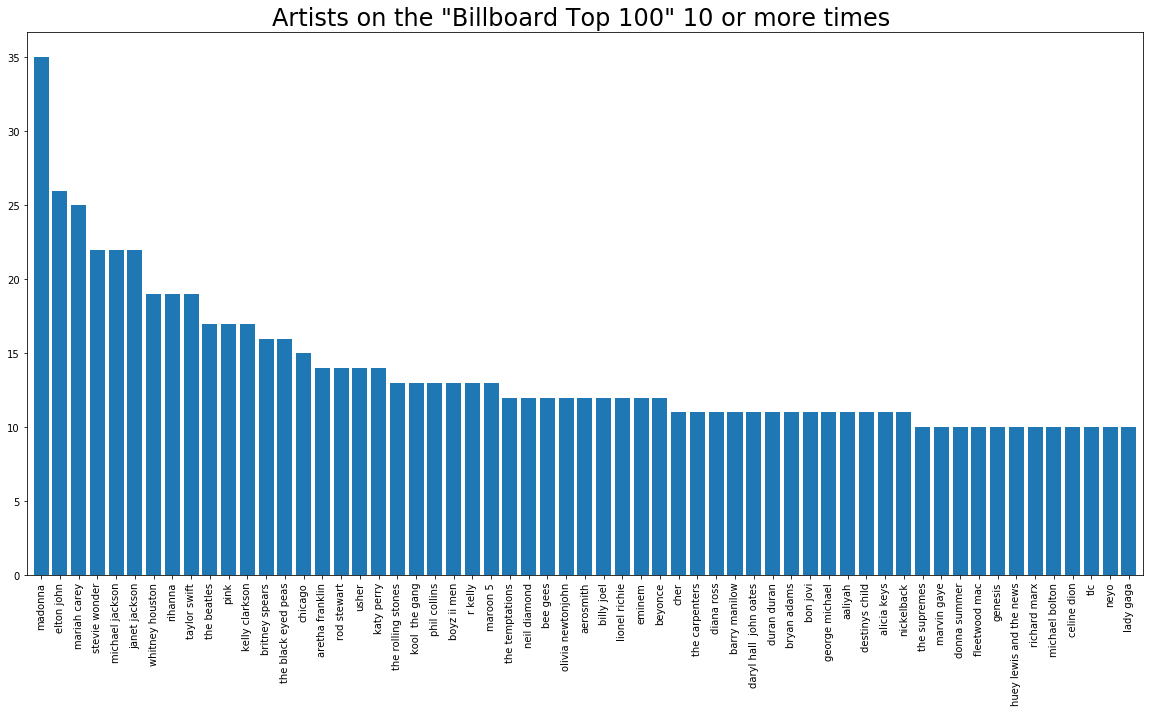

In [62]:
# Plotting the Dictionary onto a Bar Chart
plt.figure(figsize = (20,10))
plt.bar(major_artists_sort.keys(), major_artists_sort.values())
plt.xticks(rotation=90)
plt.xlim(-0.75, 58.75)
plt.title('Artists on the "Billboard Top 100" 10 or more times ', size = 24)
plt.show()